# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [2]:
from zipfile import ZipFile

from PIL import Image, ImageDraw
import pytesseract 
import cv2 as cv
import numpy as np
from IPython.display import display
import os
import math

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [3]:
with ZipFile('readonly/images.zip', 'r') as file:
    file.extractall()

In [4]:
!dir

a-0.png   a-8.png		 module_2-lec5.ipynb
a-10.png  a-9.png		 module_2-lec6.ipynb
a-11.png  assignment_1.ipynb	 module_3.ipynb
a-12.png  black_white_noise.jpg  module_3-lec1.ipynb
a-13.png  greyscale_noise.jpg	 module_3-lec2.ipynb
a-1.png   module_1.ipynb	 module_3-lec3.ipynb
a-2.png   module_1-lec1.ipynb	 module_3-lecoptional.ipynb
a-3.png   module_1-lec2.ipynb	 msi_recruitment.png
a-4.png   module_1-lec3.ipynb	 project.ipynb
a-5.png   module_2.ipynb	 readonly
a-6.png   module_2-lec3.ipynb	 resized_nois.png
a-7.png   module_2-lec4.ipynb	 result.png


In [198]:
# here we can see that after extracting the files we have file names from a-0.png to a-13.png. We can easily read the image files now
# from the folder


In [192]:
def return_cropped_images(image):
    max_size = (100, 100)
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    #img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
    #img = cv.threshold(img, 170, 255, cv.THRESH_BINARY)[1]
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.35)
    
    
    pil_img = Image.fromarray(img, mode = 'L')
    draw = ImageDraw.Draw(pil_img)
    contact_sheet = Image.new('RGB', (max_size[0]*5, max_size[1]*(math.ceil(len(faces)/5))))    
    x_ = 0
    y_ = 0

    for x, y, w, h in faces:
        #draw.rectangle((x, y, x+w, y+h), outline = 'red', width = 10)
        imgg = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        imgg = Image.fromarray(imgg)
        crop_img = imgg.crop((x, y, x+w, y+h))
        crop_img.thumbnail(max_size)
        contact_sheet.paste(crop_img, (x_, y_))
        
        if(x_ + max_size[0] == contact_sheet.width):
            x_ = 0
            y_ = y_ + max_size[0]
        else:
            x_ = x_ + max_size[0]
    if(len(faces) == 0):
        return None
    
    return contact_sheet

In [200]:
contact_list = []
file_name = []
for i in range(14):
    file_name.append(f"a-{i}.png")
    imgs = cv.imread(f"a-{i}.png")
    contact_list.append(return_cropped_images(imgs))
    print(f"{i+1} done!")

1 done!
2 done!
3 done!
4 done!
5 done!
6 done!
7 done!
8 done!
9 done!
10 done!
11 done!
12 done!
13 done!
14 done!


In [122]:
contents = []
for i in range(14):
    img = Image.open(f"a-{i}.png").convert('1')
    contents.append(pytesseract.image_to_string(img))
    print(f"{i+1} content covered")

1 content covered
2 content covered
3 content covered
4 content covered
5 content covered
6 content covered
7 content covered
8 content covered
9 content covered
10 content covered
11 content covered
12 content covered
13 content covered
14 content covered


In [210]:
def search(keyword):
    print('Results for keyword:{}'.format(keyword))
    for i, item in enumerate(contents):
        if keyword in item:
            print('Results found in file {}'.format(file_name[i]))
            if(contact_list[i] == None):
                print('But there were no faces in that file!', end = '\n\n')
            else:
                display(contact_list[i])
                print('\n\n')

Results for keyword:Christopher
Results found in file a-0.png


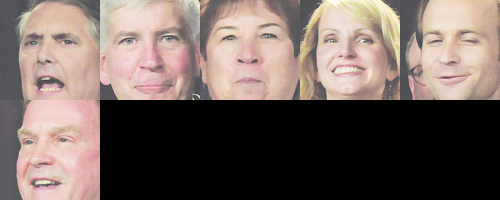




Results found in file a-3.png


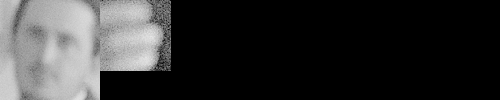

In [211]:
# searching for the word 'christopher' we obtain the following results
search('Christopher')

Results for keyword:Mark
Results found in file a-0.png


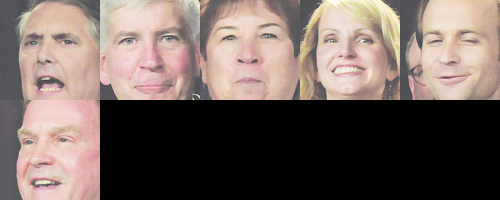




Results found in file a-1.png


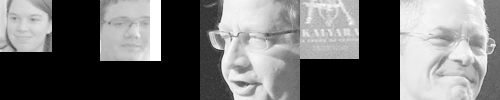




Results found in file a-2.png


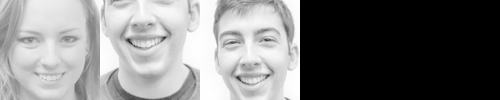




Results found in file a-3.png


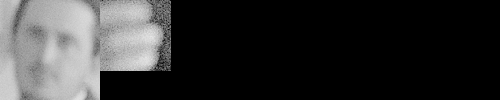




Results found in file a-8.png
But there were no faces in that file!

Results found in file a-10.png
But there were no faces in that file!

Results found in file a-13.png


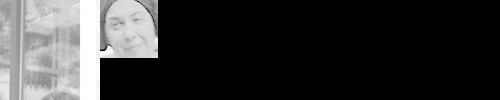

In [212]:
# Searching for the word 'Mark' , we obtain the following results
search('Mark')